Task:
- Initialize Selenium WebDriver
- Load the Web Page
- Identify the elements that contain hosting plan details.
- Extract necessary data such as plan names, features, and pricing.
- Store and Save the Data
- Close Selenium WebDriver


In [2]:
# Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

In [5]:
# Set Chrome options
options = webdriver.ChromeOptions()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--window-position=-10000,0')  # Move window off-screen

# Initialize WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Open the URL
url = 'https://www.inmotionhosting.com/shared-hosting'
driver.get(url)

# Scroll the whole page
last_height = driver.execute_script("return document.body.scrollHeight")

n_scrolls = 1
while True:
    print(f'Making scroll {n_scrolls}')
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for new content to load
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    n_scrolls += 1

# Get the page source and parse it with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Save the soup object as an HTML file
with open('output.html', 'w', encoding='utf-8') as file:
    file.write(soup.prettify())

# Close the driver
driver.quit()

Making scroll 1


We'll look for these elements  

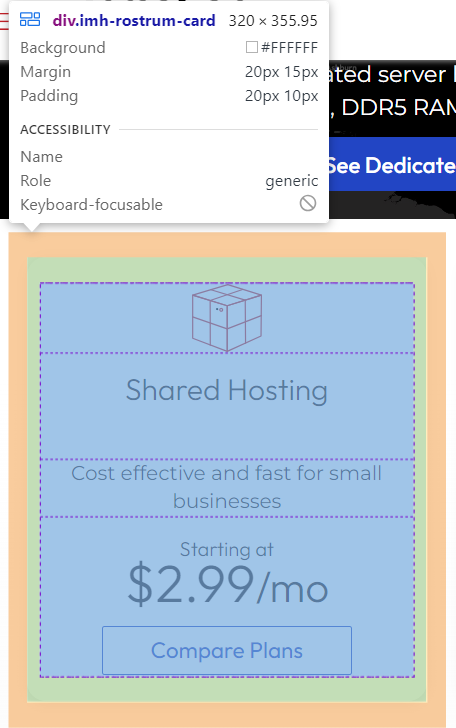

Inside there is name

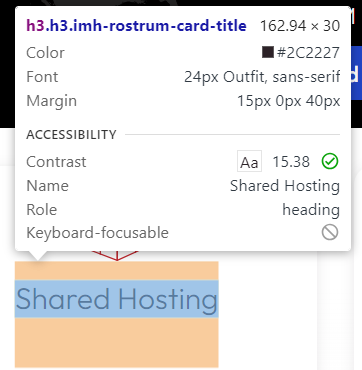

Pricing

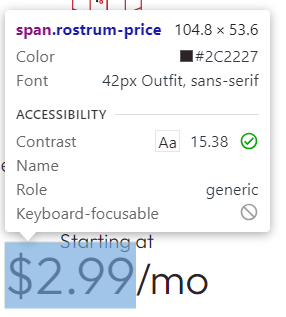

And features

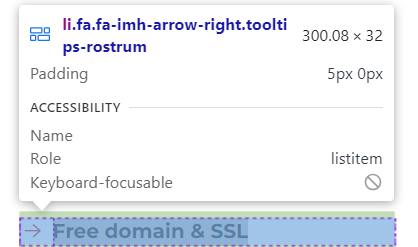



In [47]:
# Extract necessary data such as plan names, features, and pricing.

# Empty lists to store data
plan_names = []
features = dict()
prices = []

# Blocks with data
blocks = soup.find_all('div', class_='imh-rostrum-card')


for block in blocks:

    # Extract plan names
    plan_name_parse = block.find_all('h3', class_='h3 imh-rostrum-card-title')
    plan_name = plan_name_parse[0].text
    plan_names.append(plan_name)

    # Extract pricing
    price_parse = block.find_all('span', class_='rostrum-price')
    price = price_parse[0].text
    prices.append(price)

    # Extract features
    features_parse = block.find_all('li', class_='fa fa-imh-arrow-right tooltips-rostrum')
    for feature in features_parse:
        feature_text = feature.text.strip()
        if plan_name not in features:
            features[plan_name] = []
        features[plan_name].append(feature_text)


# Print the extracted data
print(plan_names)
print(prices)
print(features)

# Checking lengths
print(len(blocks))
print(len(plan_names))
print(len(prices))
print(len(features))


['Core', 'Launch', 'Power', 'Pro']
['$3.19', '$4.99', '$4.99', '$10.99']
{'Core': ['Free domain & SSLFree domain & SSLFree domain & SSLFree SSL', '2 Websites', '100GB SSD', 'Unlimited Bandwidth', '2x Speed & Performance', '10 Email Addresses', 'Security SuiteFree SSLHack &\xa0 Malware ProtectionDDoS ProtectionAutomatic Backups AvailableMonarx Security($19.99 Value)', 'Free SSL', 'Hack &\xa0 Malware Protection', 'DDoS Protection', 'Automatic Backups Available', 'Monarx Security($19.99 Value)', 'Marketing ToolsWebsite BuilderEmail on Any DeviceFree Advertising CreditsCustomer Management Tools', 'Website Builder', 'Email on Any Device', 'Free Advertising Credits', 'Customer Management Tools', 'Hosting PlusPython,\xa0 Node.JS, \xa0 Ruby and GIT version control.', 'Choice of Data Center LocationIncludes US and EU Locations', 'Live Chat Support from Helpful Humans'], 'Launch': ['Free domain & SSLFree domain & SSLFree domain & SSLFree SSL', '25 Websites', 'Unlimited NVMe SSD', 'Unlimited Band

We should clean features

In [57]:
import pandas as pd


df = pd.DataFrame({'Plan Name': plan_names, 'Price': prices, 'Features': list(features.values())})
df

,Plan Name,Price,Features
0,Core,$3.19,"[Free domain & SSL, 2 Websites, 100GB SSD, Unl..."
1,Launch,$4.99,"[Free domain & SSL, 25 Websites, Unlimited NVM..."
2,Power,$4.99,"[Free domain & SSL, Unlimited Websites, Unlimi..."
3,Pro,$10.99,"[Free domain & SSL, Unlimited Websites, Unlimi..."
